<a href="https://colab.research.google.com/github/Juny2312/Business_Analysis/blob/main/%5B_Open_%5D_Hyperparameter_Tuning_with_fixing_plot_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download

In [ ]:
# https://docs.google.com/spreadsheets/d/1U4W8lvvGoj3IXoVvGHpwd8vhbj0KbvbSOMs7hCJVAaQ/edit#gid=433227997

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [ ]:
from download import download

In [ ]:
import pandas as pd

df = pd.read_csv('tst.csv')

In [ ]:
df.head()

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.



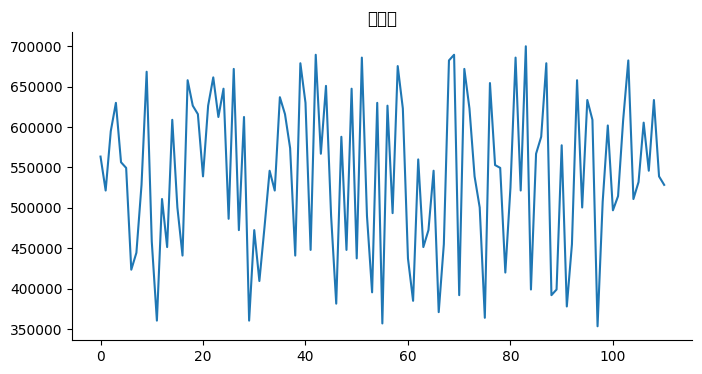

In [ ]:
# @title 강남점

from matplotlib import pyplot as plt
df['강남점'].plot(kind='line', figsize=(8, 4), title='강남점')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df['date'] = pd.to_datetime(df['판매일'])

# extract the day, month, and year components
df['day'] = df['date'].dt.day#.fillna(0).astype('int64')
df['month'] = df['date'].dt.month#.fillna(0).astype('int64')
df['year'] = df['date'].dt.year#.fillna(0).astype('int64')

# show the modified data frame
print(df)


           판매일     강남점     명동점     홍대점    영등포점    압구정점    동대문점     용산점  \
0     1/1/2019  563500  448000  633500  637000  420000  588000  430500   
1     1/2/2019  521500  679000  679000  633500  637000  598500  514500   
2     1/3/2019  595000  399000  378000  532000  392000  430500  644000   
3     1/4/2019  630000  658000  640500  395500  423500  549500  644000   
4     1/5/2019  556500  637000  591500  556500  367500  486500  542500   
..         ...     ...     ...     ...     ...     ...     ...     ...   
106  4/17/2019  605500  654500  633500  423500  476000  490000  434000   
107  4/18/2019  546000  448000  535500  385000  682500  696500  623000   
108  4/19/2019  633500  539000  504000  455000  616000  451500  371000   
109  4/20/2019  539000  465500  525000  539000  350000  451500  682500   
110  4/21/2019  528500  399000  483000  696500  584500  665000  577500   

        신촌점    서울역점  Grand Total Growth Rate       date  day  month  year  
0    381500  455000      4557000   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   판매일          111 non-null    object        
 1   강남점          111 non-null    int64         
 2   명동점          111 non-null    int64         
 3   홍대점          111 non-null    int64         
 4   영등포점         111 non-null    int64         
 5   압구정점         111 non-null    int64         
 6   동대문점         111 non-null    int64         
 7   용산점          111 non-null    int64         
 8   신촌점          111 non-null    int64         
 9   서울역점         111 non-null    int64         
 10  Grand Total  111 non-null    int64         
 11  Growth Rate  110 non-null    object        
 12  date         111 non-null    datetime64[ns]
 13  day          111 non-null    int64         
 14  month        111 non-null    int64         
 15  year         111 non-null    int64         
dtypes: datet

In [ ]:
df.describe()

,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,day,month,year
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.0
mean,540355.855856,536950.450450,531527.027027,528405.405405,525189.189189,524337.837838,521153.153153,513018.018018,506459.459459,4.727396e+06,14.675676,2.378378,2019.0
std,98076.301173,101092.643266,98936.982649,100569.119459,101699.312907,100455.059200,106820.086483,106181.810802,98548.007109,2.776948e+05,8.501510,1.087567,0.0
min,353500.000000,353500.000000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000,353500.000000,350000.000000,4.098500e+06,1.000000,1.000000,2019.0
25%,456750.000000,460250.000000,451500.000000,439250.000000,437500.000000,441000.000000,430500.000000,406000.000000,416500.000000,4.530750e+06,7.500000,1.000000,2019.0
50%,546000.000000,532000.000000,535500.000000,539000.000000,542500.000000,521500.000000,514500.000000,525000.000000,497000.000000,4.749500e+06,14.000000,2.000000,2019.0
75%,626500.000000,626500.000000,619500.000000,609000.000000,609000.000000,598500.000000,612500.000000,602000.000000,574000.000000,4.940250e+06,21.000000,3.000000,2019.0
max,700000.000000,696500.000000,700000.000000,696500.000000,700000.000000,700000.000000,700000.000000,696500.000000,693000.000000,5.295500e+06,31.000000,4.000000,2019.0


In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019


In [ ]:
index_df = df.set_index('date')

In [ ]:
index_df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,day,month,year
date,,,,,,,,,,,,,,,
2019-01-01,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,1,1,2019
2019-01-02,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2,1,2019
2019-01-03,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,3,1,2019
2019-01-04,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,4,1,2019
2019-01-05,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-17,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,17,4,2019
2019-04-18,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,18,4,2019
2019-04-19,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,19,4,2019


<Axes: xlabel='date'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45824 (\N{HANGUL SYLLABL

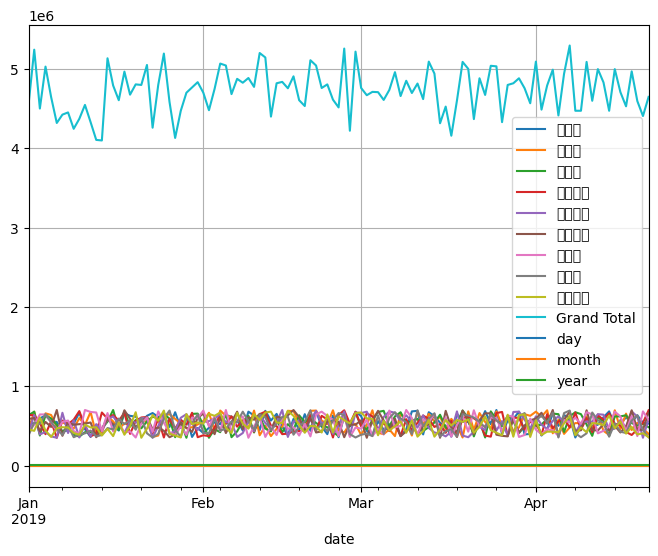

In [ ]:
index_df.plot(grid=True)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df,x='date', y='Grand Total',title='sales sector 1')

In [ ]:
fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector = dict(
        buttons=list([
            dict(count=1, label = "1M", step= "month", stepmode="backward"),
            dict(count=2, label = "2M", step= "month", stepmode="backward"),
            dict(count=3, label = "3M", step= "month", stepmode="backward"),
            dict(count=4, label = "4M", step= "month", stepmode="backward"),
            dict(step="all")
        ])
    )
)



# aggregation

1. max
2. min - max

In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019


In [ ]:
df[["month","Grand Total"]]

,month,Grand Total
0,1,4557000
1,1,5243000
2,1,4501000
3,1,5029500
4,1,4644500
...,...,...
106,4,4529000
107,4,4970000
108,4,4595500
109,4,4406500


In [ ]:
# from matplotlib import pyplot as plt
# _df_2.plot(kind='scatter', x='month', y='Grand Total', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

Distribution of 1 and 2

Visualize with density of 2

Correlation between series

In [ ]:
df[["month","Grand Total"]].groupby('month').describe()

Grand Total                                                     \
            count          mean            std        min        25%   
month                                                                  
1            31.0  4.627000e+06  319153.176390  4098500.0  4397750.0   
2            28.0  4.815500e+06  259940.235296  4221000.0  4665500.0   
3            31.0  4.731323e+06  232234.814659  4158000.0  4614750.0   
4            21.0  4.752333e+06  268433.387144  4406500.0  4487000.0   

                                        
             50%        75%        max  
month                                   
1      4606000.0  4802000.0  5243000.0  
2      4812500.0  5043500.0  5257000.0  
3      4735500.0  4882500.0  5092500.0  
4      4707500.0  4991000.0  5295500.0

In [ ]:
dfgt = df[["month","Grand Total"]].groupby('month').agg({'Grand Total':['min','max']})

array([<Axes: xlabel='month'>, <Axes: xlabel='month'>], dtype=object)

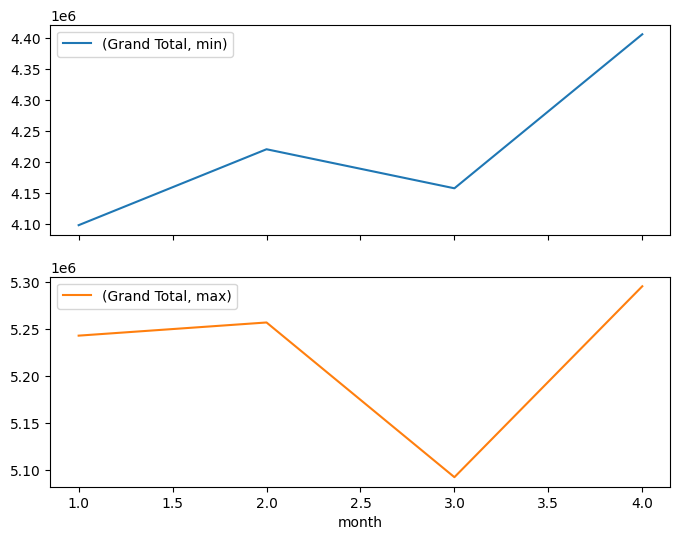

In [ ]:
dfgt.plot(subplots=True)

month
1    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
2    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
3    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
4    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object

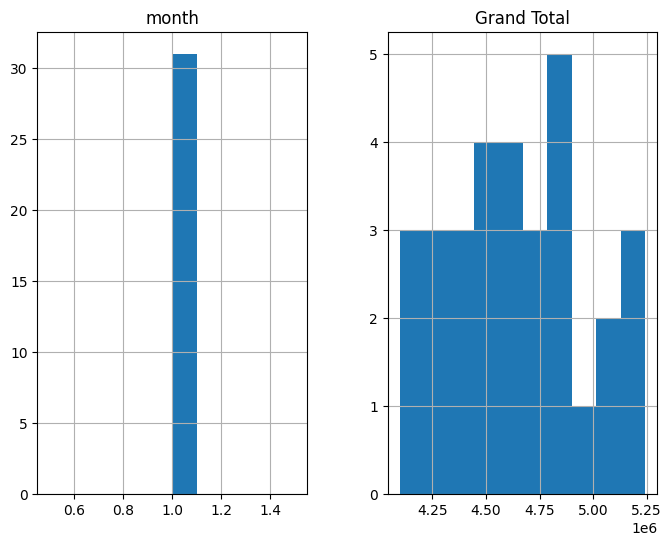

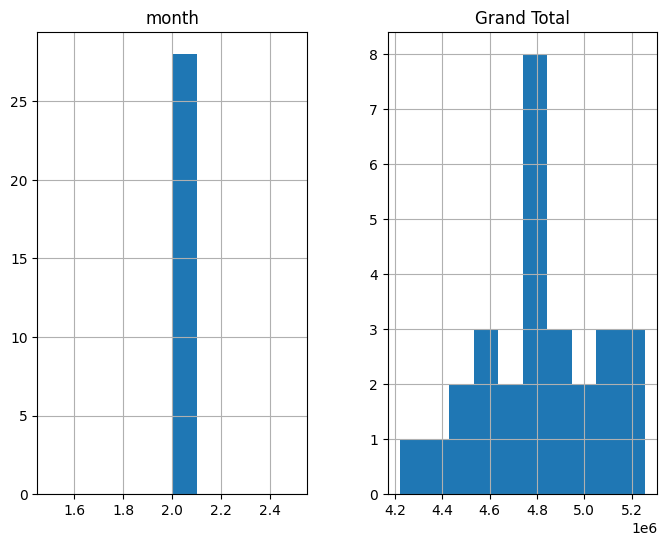

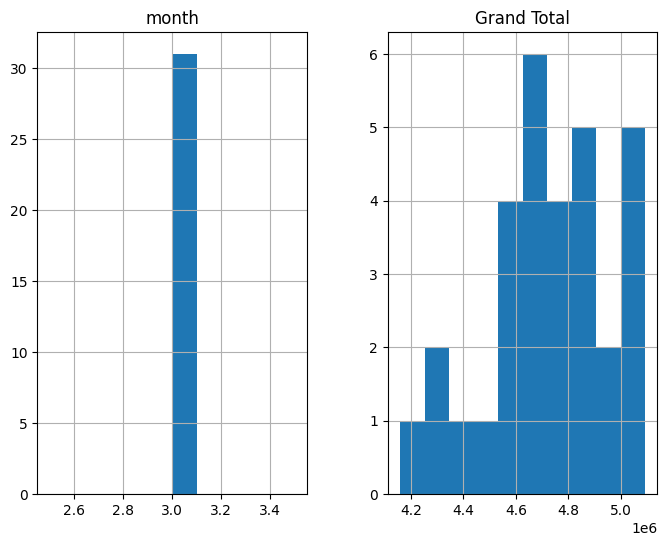

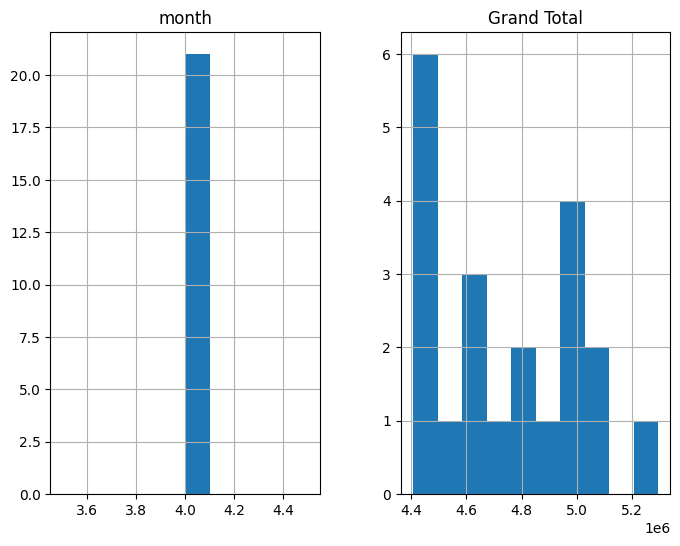

In [ ]:
dd=df[["month","Grand Total"]].groupby('month')
dd.hist()

<Axes: ylabel='Density'>

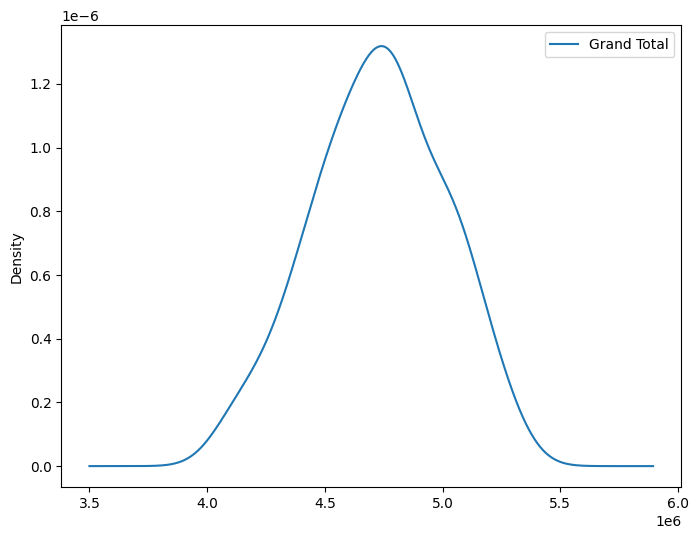

In [ ]:
df[["Grand Total"]].plot(kind='density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

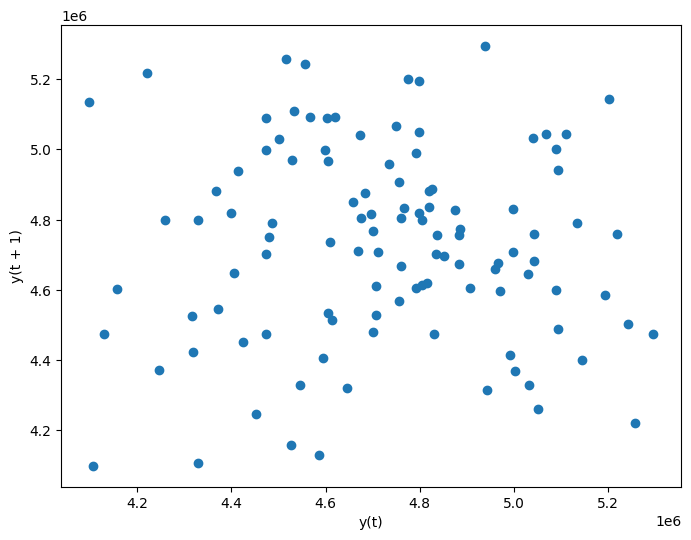

In [ ]:
pd.plotting.lag_plot(df["Grand Total"],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

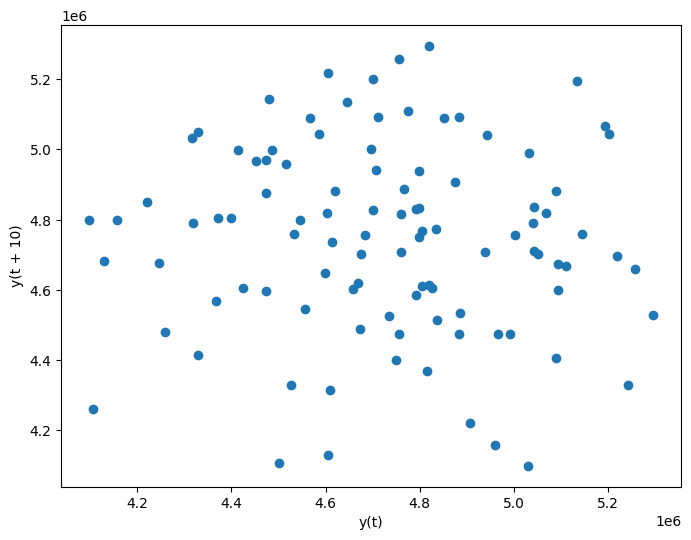

In [ ]:
pd.plotting.lag_plot(df["Grand Total"],lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 100)'>

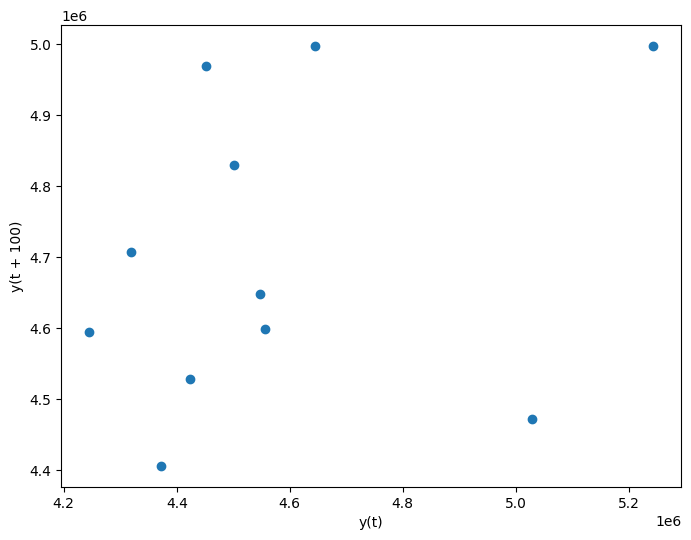

In [ ]:
pd.plotting.lag_plot(df["Grand Total"],lag=100)

In [ ]:
sales_series = df[["판매일" 	,"강남점" ,	"명동점" ,	"홍대점" ,	"영등포점" ,	"압구정점" ,	"동대문점" ,	"용산점" ,	"신촌점" ,"서울역점"]]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45824 (\N{HANGUL SYLLABL

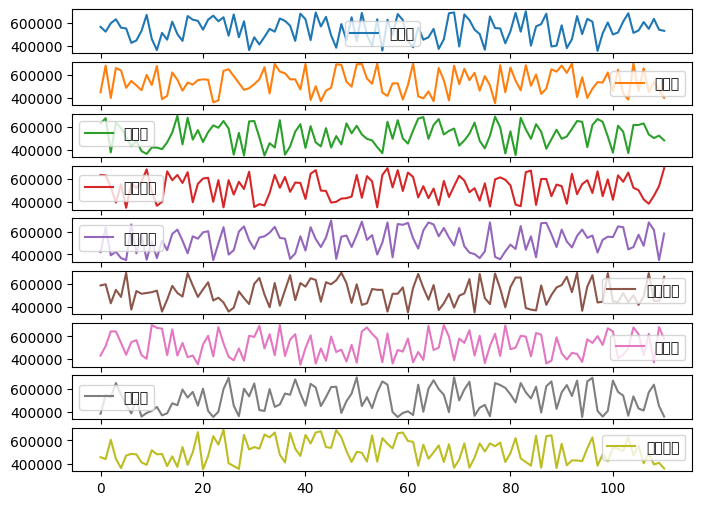

In [ ]:
sales_series.plot(subplots=True)

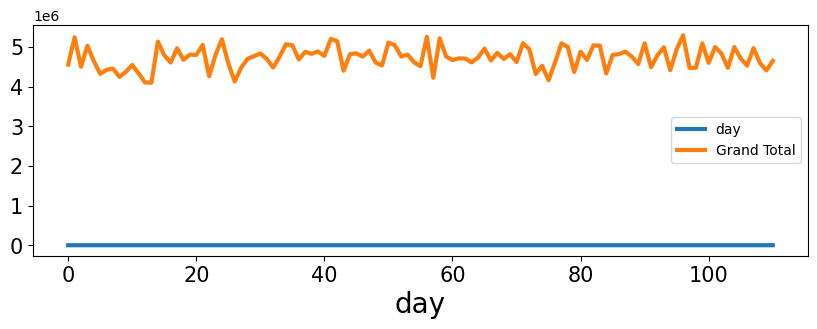

In [ ]:
df[["day","Grand Total"]].plot(figsize=(10,3), linewidth=3, fontsize=15)
plt.xlabel("day",fontsize=20);

In [ ]:
cor = sales_series[["판매일" 	,"강남점" ,	"명동점" ,	"홍대점" ,	"영등포점" ,	"압구정점" ,	"동대문점" ,	"용산점" ,	"신촌점" ,"서울역점"]].corr(method='pearson')
cor

<ipython-input-345-808dcdb3c664>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점
강남점,1.000000,-0.090843,0.020300,-0.058833,0.021645,0.062486,-0.101555,0.009210,0.083579
명동점,-0.090843,1.000000,0.045074,-0.073179,-0.142911,-0.048517,-0.124654,0.067866,-0.098753
홍대점,0.020300,0.045074,1.000000,0.045873,0.052814,0.072028,-0.013999,0.107191,-0.179980
영등포점,-0.058833,-0.073179,0.045873,1.000000,0.098399,-0.133078,-0.134382,-0.094664,-0.184817
압구정점,0.021645,-0.142911,0.052814,0.098399,1.000000,-0.048507,-0.003172,-0.001314,0.103425
동대문점,0.062486,-0.048517,0.072028,-0.133078,-0.048507,1.000000,-0.076259,0.123669,0.035061
용산점,-0.101555,-0.124654,-0.013999,-0.134382,-0.003172,-0.076259,1.000000,-0.010659,-0.092198
신촌점,0.009210,0.067866,0.107191,-0.094664,-0.001314,0.123669,-0.010659,1.000000,0.018050
서울역점,0.083579,-0.098753,-0.179980,-0.184817,0.103425,0.035061,-0.092198,0.018050,1.000000


<ipython-input-346-124a048d5f34>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.

/usr/local/lib/python3.10/dist-pac

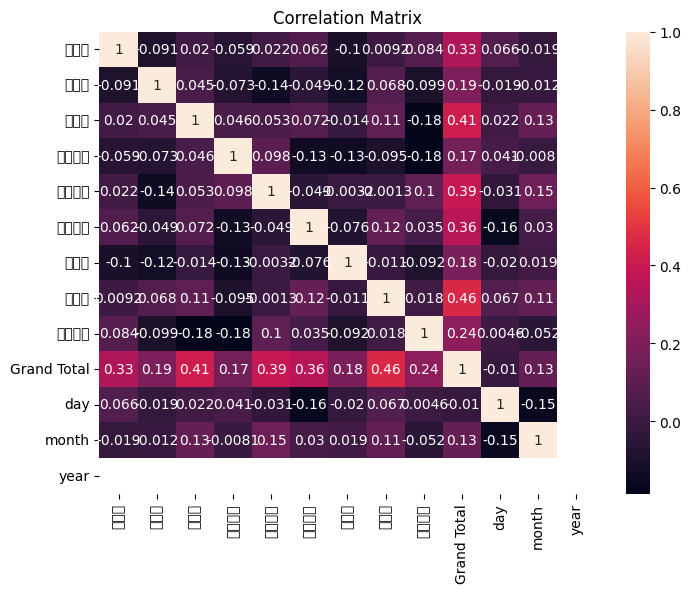

In [ ]:
# @title Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
_ = plt.title('Correlation Matrix')

In [ ]:
df.groupby('day').agg(median=('Grand Total','median'), mean = ('Grand Total','mean'), max = ('Grand Total','max'), min=('Grand Total','min')).reset_index()

,day,median,mean,max,min
0,1,4730250.0,4.777500e+06,5092500,4557000
1,2,4578000.0,4.719750e+06,5243000,4480000
2,3,4730250.0,4.688250e+06,4791500,4501000
3,4,5010250.0,4.949000e+06,5068000,4707500
4,5,4627000.0,4.677750e+06,5043500,4413500
5,6,4709250.0,4.669000e+06,4938500,4319000
6,7,4917500.0,4.888625e+06,5295500,4424000
7,8,4565750.0,4.602500e+06,4826500,4452000
8,9,4662000.0,4.613875e+06,4886000,4245500
9,10,4735500.0,4.732875e+06,5089000,4371500


In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019


# correlation x variable was requested

converge :

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

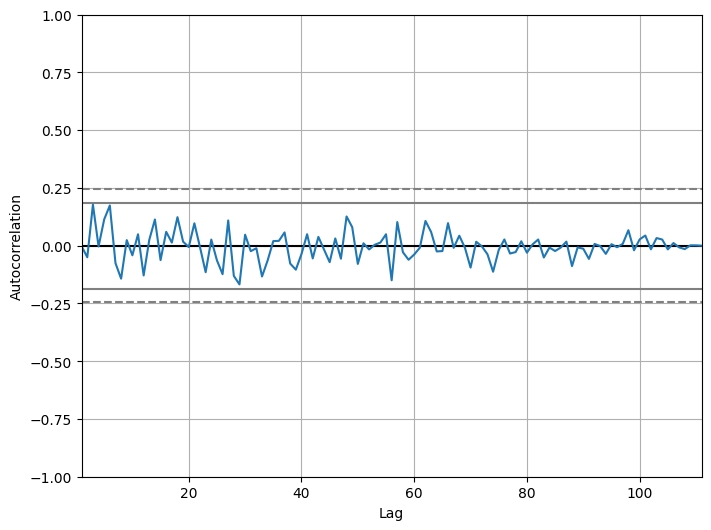

In [ ]:
pd.plotting.autocorrelation_plot(df["Grand Total"])#.resample("1n").mean()

# Moving Average

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [ ]:
simple_ma = df['Grand Total'].rolling(window=3).mean()

<Axes: >

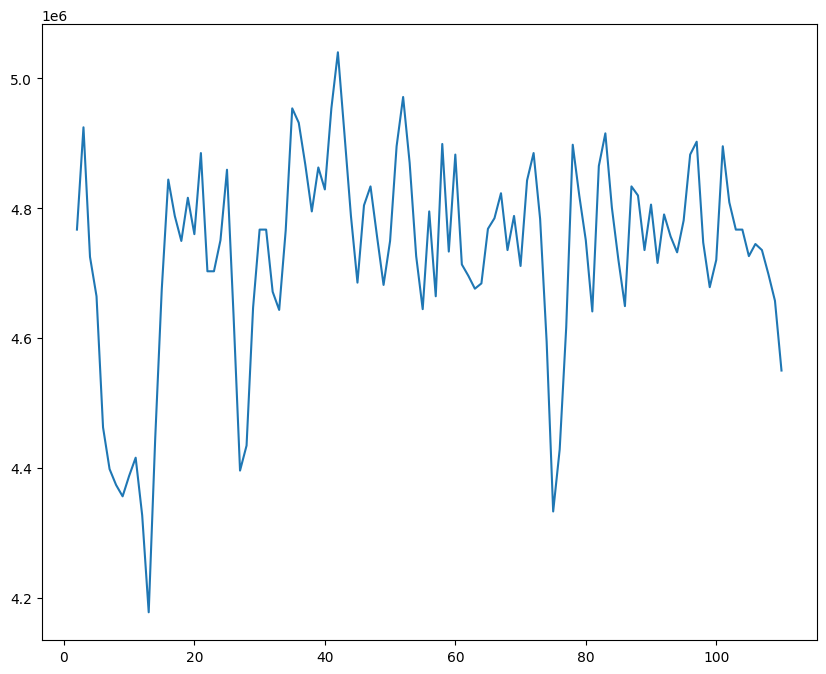

In [ ]:
simple_ma.plot()

In [ ]:
df['ma_rolling_3'] = df['Grand Total'].rolling(window=3).mean().shift(1)

In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year,ma_rolling_3
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019,NaN
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019,NaN
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019,NaN
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019,4.767000e+06
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019,4.924500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019,4.726167e+06
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019,4.744833e+06
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019,4.735500e+06
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019,4.698167e+06


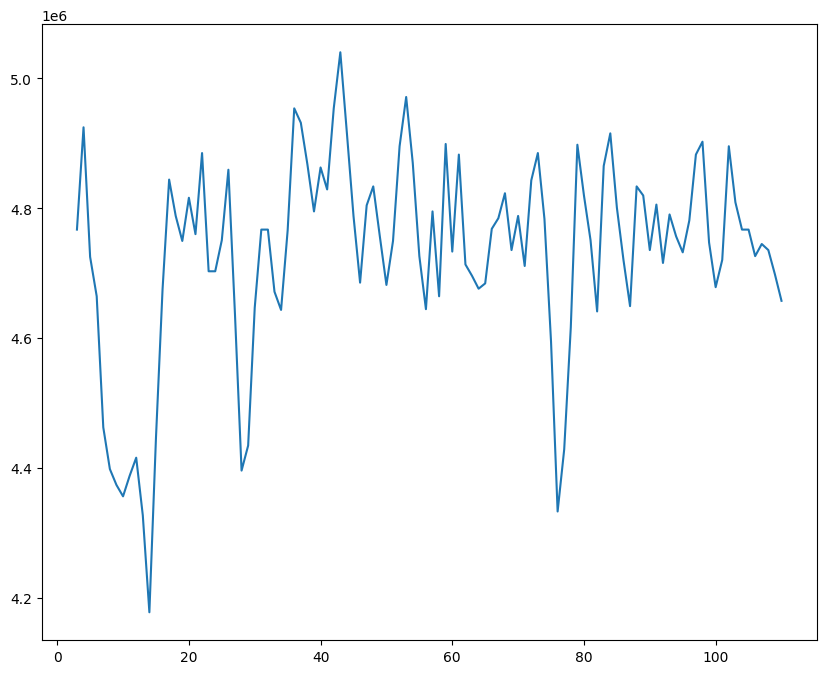

In [ ]:
df['ma_rolling_3'].plot();

In [ ]:
dfma = df[["date","Grand Total","ma_rolling_3"]]

In [ ]:
dgtma = dfma.set_index("date")

In [ ]:
dgtma

,Grand Total,ma_rolling_3
date,,
2019-01-01,4557000,NaN
2019-01-02,5243000,NaN
2019-01-03,4501000,NaN
2019-01-04,5029500,4.767000e+06
2019-01-05,4644500,4.924500e+06
...,...,...
2019-04-17,4529000,4.726167e+06
2019-04-18,4970000,4.744833e+06
2019-04-19,4595500,4.735500e+06


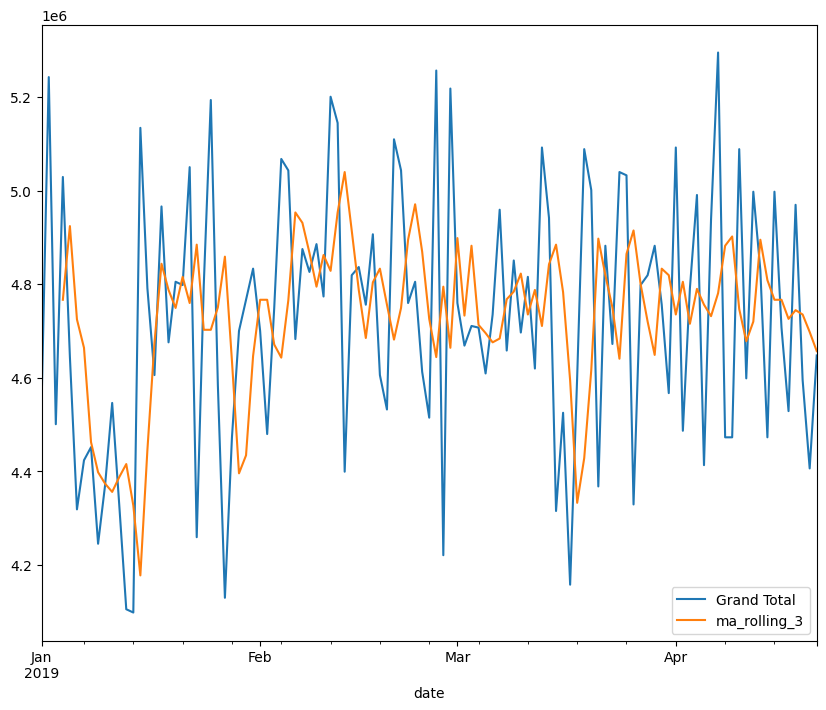

In [ ]:
dgtma.plot();

===============================================================================

Weighted moving average = (t * weighting factor) + ((t-1)* weighting factor -1 ) + ((t-n) * weighting factor - n ) / n

In [ ]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [ ]:
dtn = df['Grand Total'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

In [ ]:
df['ma_rolling_3_n'] = df['Grand Total'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year,ma_rolling_3,ma_rolling_3_n
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019,NaN,NaN
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019,NaN,NaN
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019,NaN,NaN
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019,4.767000e+06,4.757667e+06
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019,4.924500e+06,4.888917e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019,4.726167e+06,4.765250e+06
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019,4.744833e+06,4.666667e+06
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019,4.735500e+06,4.779250e+06
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019,4.698167e+06,4.709250e+06


In [ ]:
#df.plot()

# Exponential moving average
(16:04)


In [ ]:
gte = df['Grand Total'].ewm(span=3,adjust=False, min_periods=0).mean()

In [ ]:
df['eum_winodw_3_e'] = df['Grand Total'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
dfmae = df[["date","Grand Total","eum_winodw_3_e"]]

In [ ]:
#dfmae.plot()

In [ ]:
!pip install statsmodels

Data Stationary Test

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
tstest = kpss(df['Grand Total'], 'ct')

In [ ]:
tstest

(0.1396764592369056,
 0.06171026067239701,
 3,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose as sm_seasonal_decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
period = 12 # Replace with the actual period of the data

In [ ]:
res = seasonal_decompose(df['Grand Total'], model='multiplicative', period=period)

Figure(1000x800)


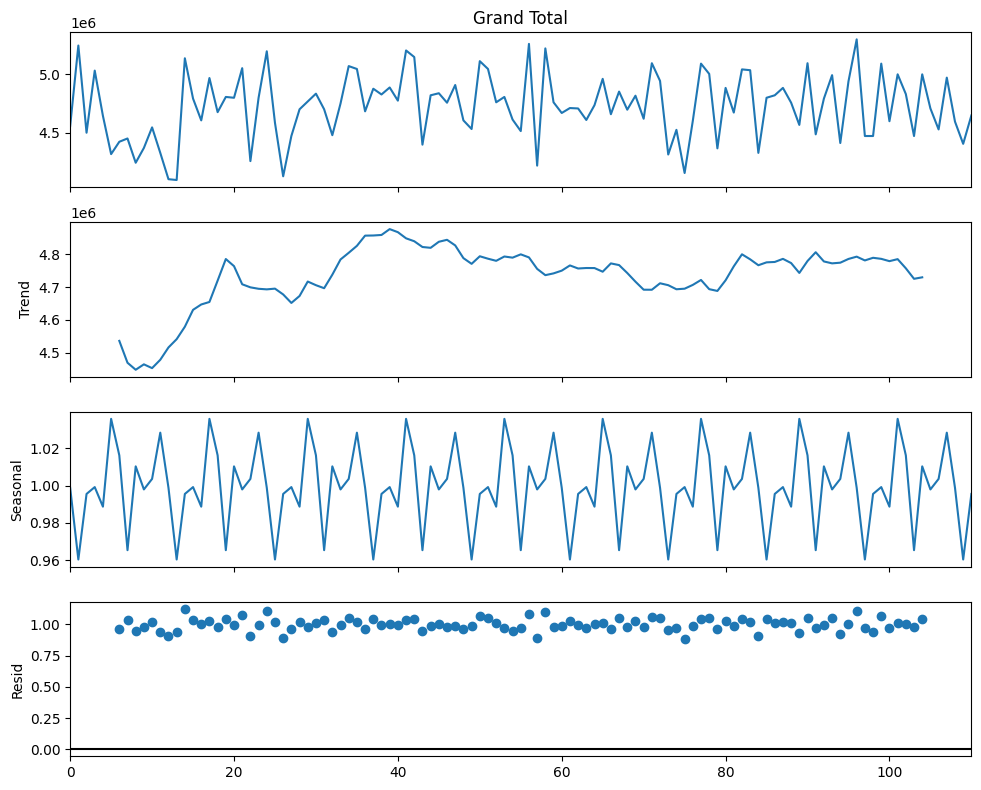

In [ ]:
print(res.plot())

<Axes: >

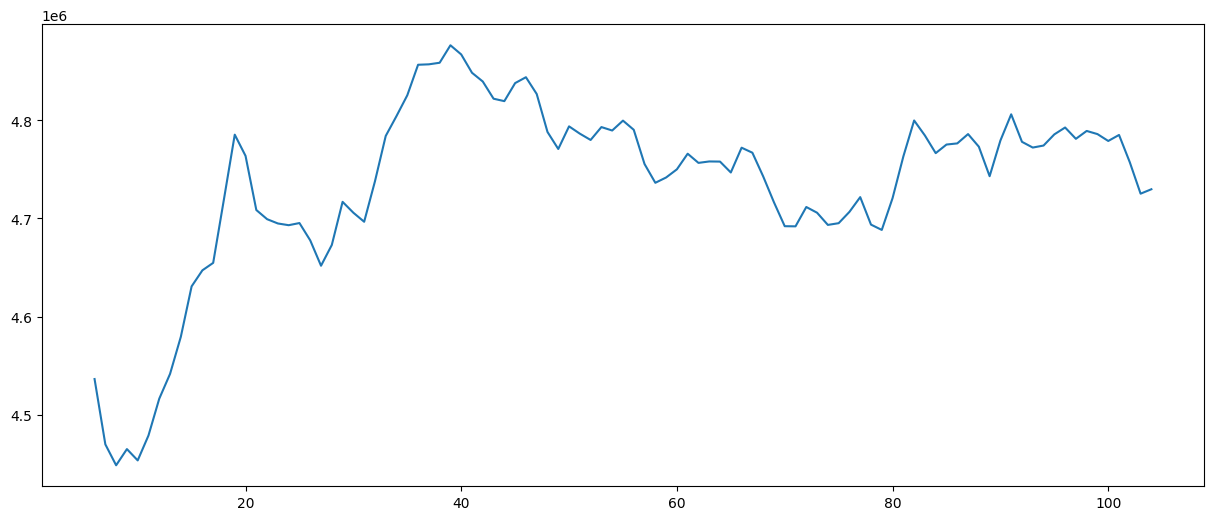

In [ ]:
plt.figure(figsize=(15,6))
res.trend.plot()

In [ ]:
res.observed

0      4557000.0
1      5243000.0
2      4501000.0
3      5029500.0
4      4644500.0
         ...    
106    4529000.0
107    4970000.0
108    4595500.0
109    4406500.0
110    4648000.0
Name: Grand Total, Length: 111, dtype: float64

In [ ]:
print(res.trend)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
Name: trend, Length: 111, dtype: float64


In [ ]:
print(res.seasonal)

0      0.998825
1      0.960272
2      0.995492
3      0.999175
4      0.988663
         ...   
106    1.003580
107    1.028411
108    0.998825
109    0.960272
110    0.995492
Name: seasonal, Length: 111, dtype: float64


In [ ]:
res.resid

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
Name: resid, Length: 111, dtype: float64

In [ ]:
res.observed[2]

4501000.0

In [ ]:
res.trend[2]*res.seasonal[2]*res.resid[2]

nan

<Axes: >

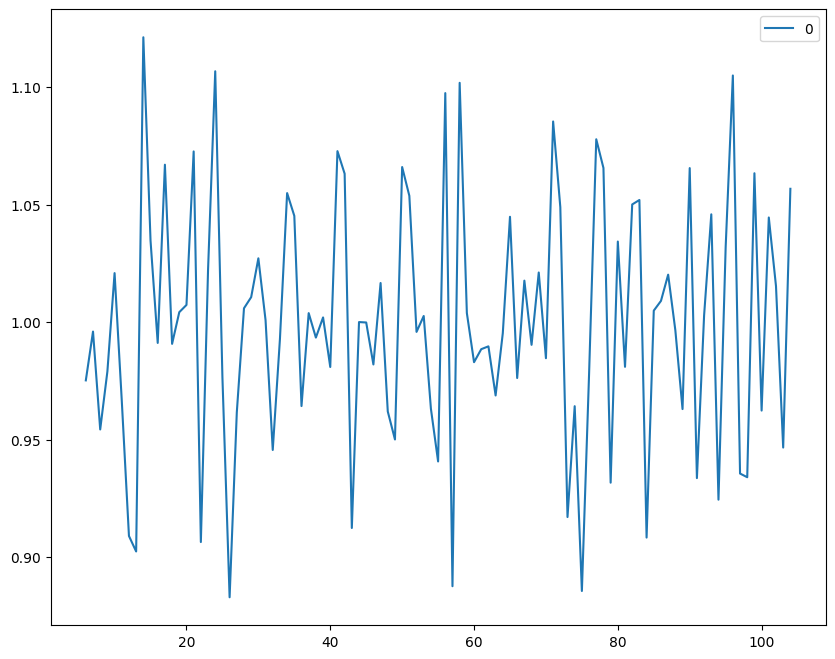

In [ ]:
pd.DataFrame(res.observed/res.trend).plot()

In [ ]:
#import requests
#import matplotlib as mpl
#import matplotlib.pyplot as plt

In [ ]:
bymonth = df[["date","Grand Total"]]
bymonth.set_index("date")

,Grand Total
date,
2019-01-01,4557000
2019-01-02,5243000
2019-01-03,4501000
2019-01-04,5029500
2019-01-05,4644500
...,...
2019-04-17,4529000
2019-04-18,4970000
2019-04-19,4595500


In [ ]:
bymonth.index = pd.to_datetime(bymonth.index)

In [ ]:
bymonth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000110
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         111 non-null    datetime64[ns]
 1   Grand Total  111 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 KB


In [ ]:
#bymonth.plot()
#bymonth.resample('D').mean()

In [ ]:
byday = df[["day","Grand Total"]]
byday.set_index("day")

,Grand Total
day,
1,4557000
2,5243000
3,4501000
4,5029500
5,4644500
...,...
17,4529000
18,4970000
19,4595500


In [ ]:
#byday.resample('M').mean()

<Axes: >

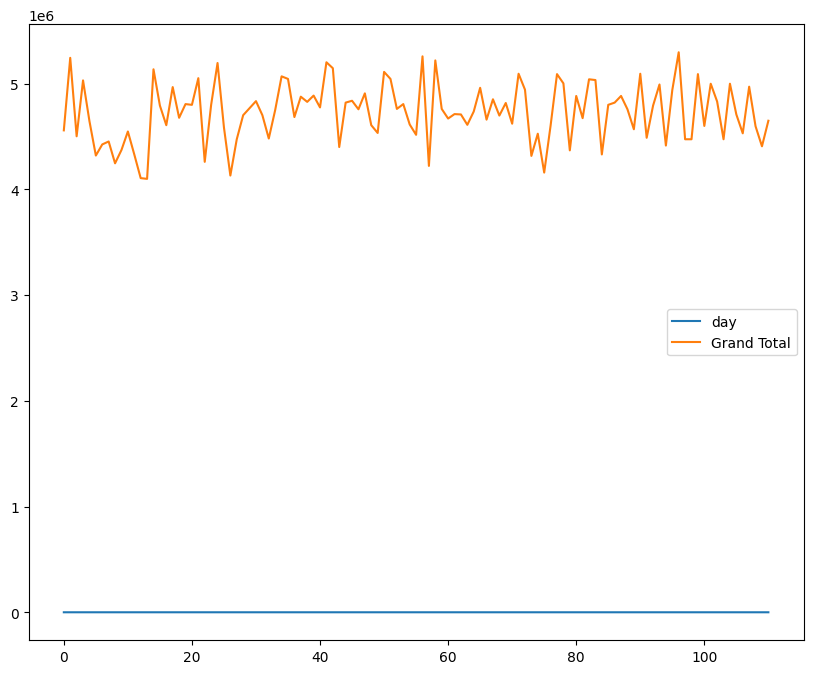

In [ ]:
byday.plot()

In [ ]:
#df.resample('Q').mean()
#byday.resample('M').mean()

<Axes: >

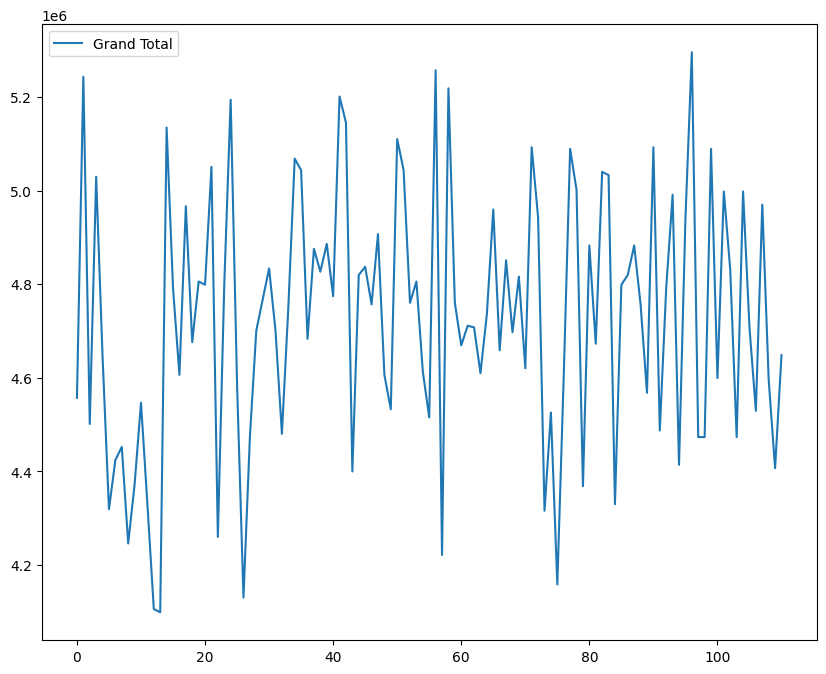

In [ ]:
bytotal = df[["Grand Total"]]
bytotal.plot()

# Needs to add Resampling

In [ ]:
df[:5]

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year,ma_rolling_3,ma_rolling_3_n,eum_winodw_3_e
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019,NaN,NaN,NaN
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019,NaN,NaN,4557000.0
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019,NaN,NaN,4900000.0
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019,4767000.0,4.757667e+06,4700500.0
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019,4924500.0,4.888917e+06,4865000.0


In [ ]:
byday.diff(2)

,day,Grand Total
0,NaN,NaN
1,NaN,NaN
2,2.0,-56000.0
3,2.0,-213500.0
4,2.0,143500.0
...,...,...
106,2.0,-469000.0
107,2.0,262500.0
108,2.0,66500.0
109,2.0,-563500.0


<Axes: >

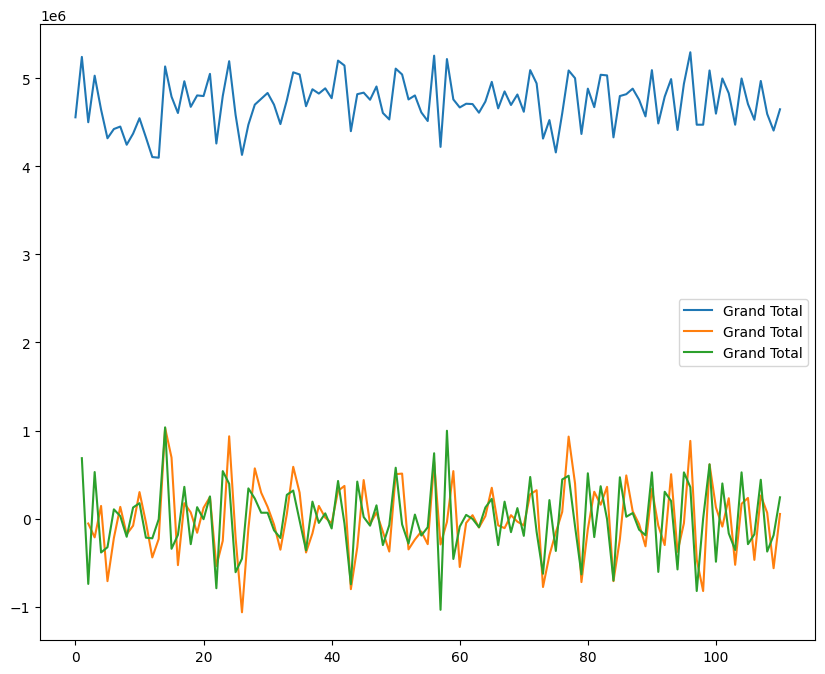

In [ ]:
pd.concat([byday['Grand Total'],byday['Grand Total'].diff(2), byday['Grand Total'].diff()],axis=1).plot()

In [ ]:
byday[:5].shift()

,day,Grand Total
0,NaN,NaN
1,1.0,4557000.0
2,2.0,5243000.0
3,3.0,4501000.0
4,4.0,5029500.0


In [ ]:
#df[:5].tshift()

<Axes: >

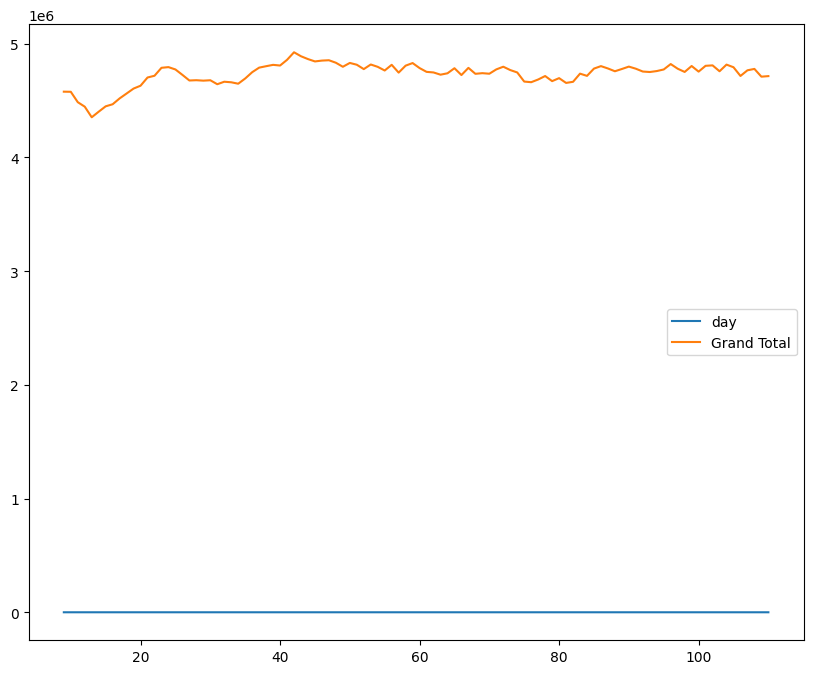

In [ ]:
byday.rolling(window=10).mean().plot()

In [ ]:
# resample

In [ ]:
#byday.rolling(window=50, win_type="gaussian",std=10).sum().plot()

<Axes: >

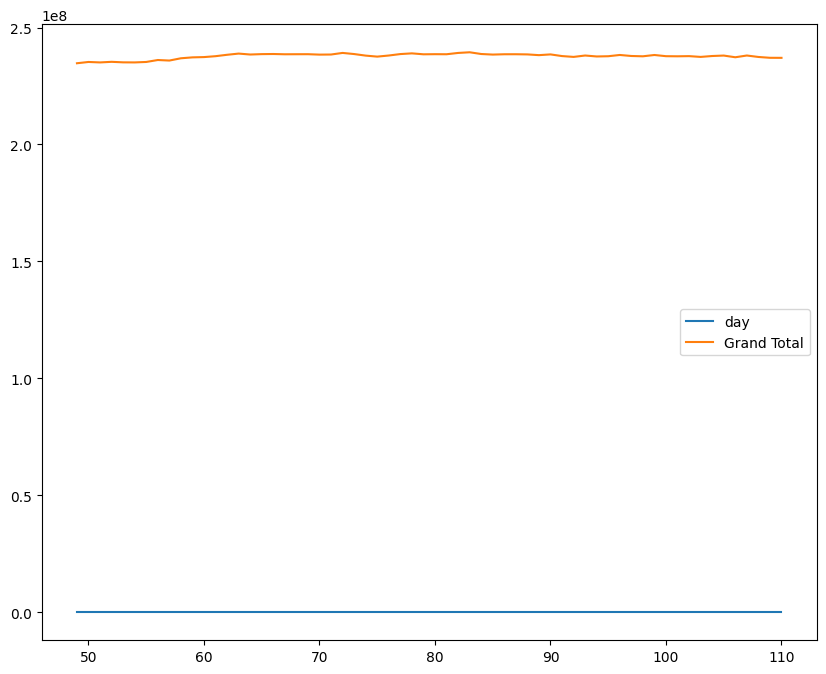

In [ ]:
byday.rolling(window=50).sum().plot()

In [ ]:
# Fix the code by removing the 'std' parameter
#byday.rolling(window=50, win_type="gaussian").sum().plot()

In [ ]:
#pd.concat([byday,byday.rolling(window=100).mean(), byday.eum(span=100).mean()],axis=1).plot()

In [ ]:
#18:05

================================================================

2. ARIMA

Asked for Tuning and Fix chart

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
idf = index_df[["Grand Total","Growth Rate"]]

In [ ]:
model = pm.auto_arima(idf['Grand Total'],m=4,seasonal=True, start_p=0,start_q=0, test='adf', error_action='ignore',
                      suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=3104.608, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=3100.610, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=3104.610, Time=0.74 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=3104.624, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=3729.276, Time=0.05 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=3102.610, Time=0.36 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=3102.608, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=3102.610, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=3102.625, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=3104.634, Time=0.31 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 2.359 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  111
Model:                        SARIMAX   Log Likelihood               -1548.305
Date:                Wed, 13 Mar 2024   AIC                           3100.610
Time:                        11:54:15   BIC                           3106.029
Sample:                    01-01-2019   HQIC                          3102.808
                         - 04-21-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.727e+06   2.64e+04    178.936      0.000    4.68e+06    4.78e+06
sigma2      7.642e+10   1.21e+10      6.334      0.000    5.28e+10       1e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.98   Prob(JB):                         0.43
Heteroskedasticity (H):               0.72   Skew:                            -0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

================================================================

In [ ]:
idf.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-04-12', '2019-04-13', '2019-04-14', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-20', '2019-04-21'],
              dtype='datetime64[ns]', name='date', length=111, freq=None)

In [ ]:
train= idf[(idf.index.get_level_values(0) >= '2019-01-01') & ( idf.index.get_level_values(0)<='2019-04-20')]
test = idf[(idf.index.get_level_values(0) > '2019-04-21')]

In [ ]:
test[:5]

,Grand Total,Growth Rate
date,,


In [ ]:
# df.index

In [ ]:
model.fit(train['Grand Total'])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True)

In [ ]:
forecast = model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(2019-04-21    4.728118e+06
 2019-04-22    4.728118e+06
 2019-04-23    4.728118e+06
 2019-04-24    4.728118e+06
 Freq: D, dtype: float64,
 array([[4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028]]))

In [ ]:
df_array = pd.DataFrame(forecast[1], columns=['Min', 'Max'])
df_combined = pd.concat([forecast[0], df_array], axis=1)
df_combined.rename(columns={0: 'Avg'}, inplace=True)

In [ ]:
print(df_combined)

                           Series       Column1       Column2
2019-04-21 00:00:00  4.728118e+06           NaN           NaN
2019-04-22 00:00:00  4.728118e+06           NaN           NaN
2019-04-23 00:00:00  4.728118e+06           NaN           NaN
2019-04-24 00:00:00  4.728118e+06           NaN           NaN
0                             NaN  4.184050e+06  5.272186e+06
1                             NaN  4.184050e+06  5.272186e+06
2                             NaN  4.184050e+06  5.272186e+06
3                             NaN  4.184050e+06  5.272186e+06


In [ ]:
forecast_df = pd.DataFrame(forecast[0],  index = test.index, columns=["Prediction"])

<Axes: >

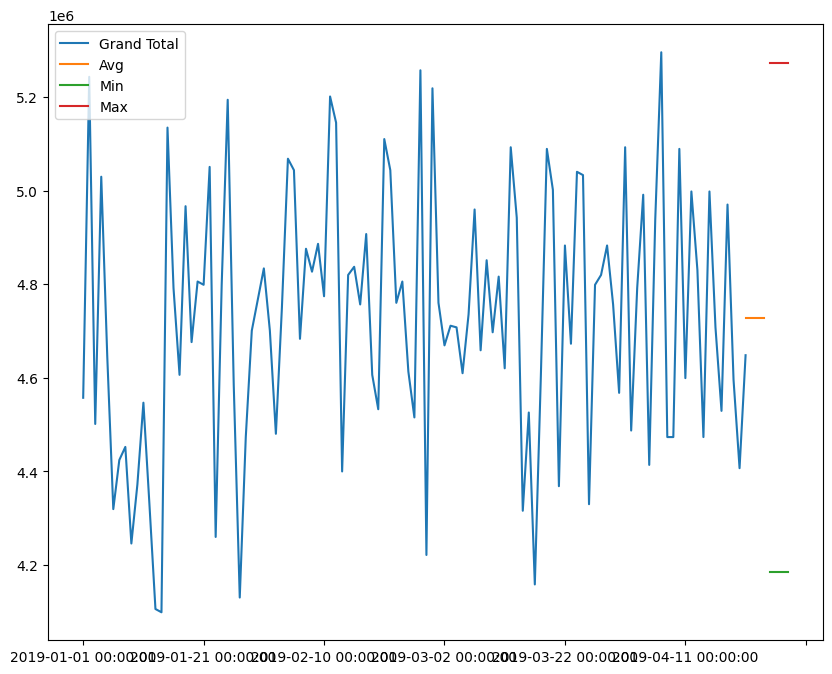

In [ ]:
pd.concat([idf['Grand Total'], df_combined], axis = 1).plot()

In [ ]:
forecast1=model.predict(n_predicts=8, return_conf_int=True)

In [ ]:
forecast1 # prediction value

(2019-04-21    4.728118e+06
 2019-04-22    4.728118e+06
 2019-04-23    4.728118e+06
 2019-04-24    4.728118e+06
 2019-04-25    4.728118e+06
 2019-04-26    4.728118e+06
 2019-04-27    4.728118e+06
 2019-04-28    4.728118e+06
 2019-04-29    4.728118e+06
 2019-04-30    4.728118e+06
 Freq: D, dtype: float64,
 array([[4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028],
        [4184050.44512608, 5272185.91851028]]))

In [ ]:
df1_array = pd.DataFrame(forecast1[1], columns=['Min', 'Max'])
df1_combined = pd.concat([forecast1[0], df_array], axis=1)
df1_combined.rename(columns={0: 'Avg'}, inplace=True)

=====fix plot

<Axes: >

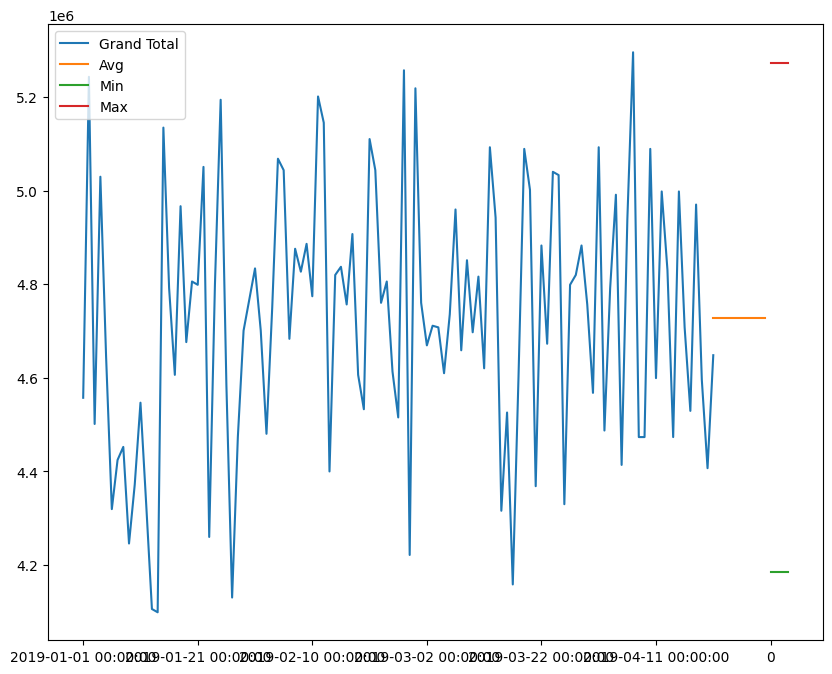

In [ ]:
pd.concat([idf['Grand Total'],df1_combined], axis=1).plot()

In [ ]:
forecast_range = pd.date_range(start='2019-04-21',periods=8,freq='D')

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],index = forecast_range, columns=['Prediction'])

In [ ]:
forecast1_df

,Prediction
2019-04-21,4.728118e+06
2019-04-22,4.728118e+06
2019-04-23,4.728118e+06
2019-04-24,4.728118e+06
2019-04-25,4.728118e+06
2019-04-26,4.728118e+06
2019-04-27,4.728118e+06
2019-04-28,4.728118e+06


https://www.youtube.com/watch?v=MngVV_4l9Po&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=9

In [ ]:
#pd.concat(idf['Grand Total'],forecast1_df,axis=1).plot()

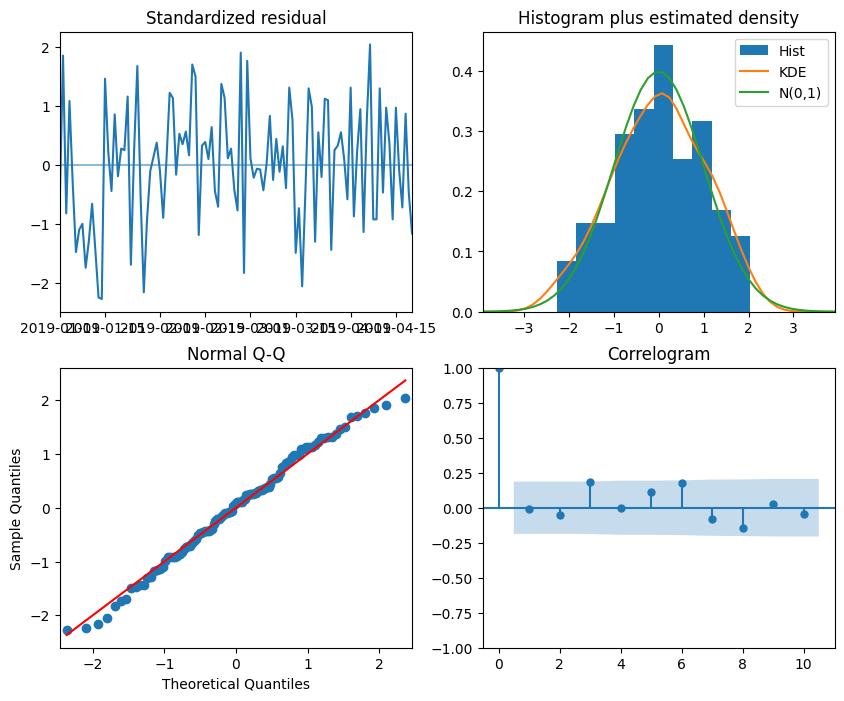

In [ ]:
out = model.plot_diagnostics()

3. Forecasting with DL




In [ ]:
!pip install --upgrade mxnet==1.6.0

In [ ]:
!pip install --upgrade gluonts

In [ ]:
import gluonts

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
N = 10  # number of time series
T = 100  # number of timesteps
prediction_length = 30
freq = "1D"
custom_dataset = np.random.normal(size=(N, T))
start = pd.Period("2019-05-01", freq=freq)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [ ]:
sales_series

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500
...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000


In [ ]:
df

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total,Growth Rate,date,day,month,year,ma_rolling_3,ma_rolling_3_n,eum_winodw_3_e
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000,NaN,2019-01-01,1,1,2019,NaN,NaN,NaN
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000,15.05%,2019-01-02,2,1,2019,NaN,NaN,4.557000e+06
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000,-14.15%,2019-01-03,3,1,2019,NaN,NaN,4.900000e+06
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500,11.74%,2019-01-04,4,1,2019,4.767000e+06,4.757667e+06,4.700500e+06
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500,-7.65%,2019-01-05,5,1,2019,4.924500e+06,4.888917e+06,4.865000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000,-3.79%,2019-04-17,17,4,2019,4.726167e+06,4.765250e+06,4.768112e+06
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000,9.74%,2019-04-18,18,4,2019,4.744833e+06,4.666667e+06,4.648556e+06
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500,-7.54%,2019-04-19,19,4,2019,4.735500e+06,4.779250e+06,4.809278e+06
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500,-4.11%,2019-04-20,20,4,2019,4.698167e+06,4.709250e+06,4.702389e+06


In [ ]:
ssig = df[["판매일" 	,"강남점" ,	"명동점" ,	"홍대점" ,	"영등포점" ,	"압구정점" ,	"동대문점" ,	"용산점" ,	"신촌점" ,"서울역점","Grand Total"]]
ssig

,판매일,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점,Grand Total
0,1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000,4557000
1,1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500,5243000
2,1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500,4501000
3,1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000,5029500
4,1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500,4644500
...,...,...,...,...,...,...,...,...,...,...,...
106,4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500,4529000
107,4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500,4970000
108,4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000,4595500
109,4/20/2019,539000,465500,525000,539000,350000,451500,682500,448000,406000,4406500


In [ ]:
ssi = sales_series.set_index('판매일')

In [ ]:
ssi

,강남점,명동점,홍대점,영등포점,압구정점,동대문점,용산점,신촌점,서울역점
판매일,,,,,,,,,
1/1/2019,563500,448000,633500,637000,420000,588000,430500,381500,455000
1/2/2019,521500,679000,679000,633500,637000,598500,514500,542500,437500
1/3/2019,595000,399000,378000,532000,392000,430500,644000,525000,605500
1/4/2019,630000,658000,640500,395500,423500,549500,644000,647500,441000
1/5/2019,556500,637000,591500,556500,367500,486500,542500,546000,360500
...,...,...,...,...,...,...,...,...,...
4/17/2019,605500,654500,633500,423500,476000,490000,434000,409500,402500
4/18/2019,546000,448000,535500,385000,682500,696500,623000,567000,486500
4/19/2019,633500,539000,504000,455000,616000,451500,371000,633500,392000


In [ ]:
#Read the csv file
dfg = ssig
print(df.head()) #7 columns, including the Date.

        판매일     강남점     명동점     홍대점    영등포점    압구정점    동대문점     용산점     신촌점  \
0  1/1/2019  563500  448000  633500  637000  420000  588000  430500  381500   
1  1/2/2019  521500  679000  679000  633500  637000  598500  514500  542500   
2  1/3/2019  595000  399000  378000  532000  392000  430500  644000  525000   
3  1/4/2019  630000  658000  640500  395500  423500  549500  644000  647500   
4  1/5/2019  556500  637000  591500  556500  367500  486500  542500  546000   

     서울역점  Grand Total Growth Rate       date  day  month  year  ma_rolling_3  \
0  455000      4557000         NaN 2019-01-01    1      1  2019           NaN   
1  437500      5243000      15.05% 2019-01-02    2      1  2019           NaN   
2  605500      4501000     -14.15% 2019-01-03    3      1  2019           NaN   
3  441000      5029500      11.74% 2019-01-04    4      1  2019     4767000.0   
4  360500      4644500      -7.65% 2019-01-05    5      1  2019     4924500.0   

   ma_rolling_3_n  eum_winodw_3_e  
0 

In [ ]:
dfg.index

RangeIndex(start=0, stop=111, step=1)

In [ ]:
sales_series['판매일']

0       1/1/2019
1       1/2/2019
2       1/3/2019
3       1/4/2019
4       1/5/2019
         ...    
106    4/17/2019
107    4/18/2019
108    4/19/2019
109    4/20/2019
110    4/21/2019
Name: 판매일, Length: 111, dtype: object

In [ ]:
#Separate dates for future plotting
train_dates = pd.to_datetime(dfg['판매일'])
print(train_dates.tail(15)) #Check last few dates.

96    2019-04-07
97    2019-04-08
98    2019-04-09
99    2019-04-10
100   2019-04-11
101   2019-04-12
102   2019-04-13
103   2019-04-14
104   2019-04-15
105   2019-04-16
106   2019-04-17
107   2019-04-18
108   2019-04-19
109   2019-04-20
110   2019-04-21
Name: 판매일, dtype: datetime64[ns]


In [ ]:
#Variables for training
cols = list(dfg)[1:6]
#Date and volume columns are not used in training.
print(cols)

#New dataframe with only training data - 5 columns
df_for_training = sales_series[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


['강남점', '명동점', '홍대점', '영등포점', '압구정점']


In [ ]:
!pip install --upgrade keras-self-attention

Asked for Hyperparameter Tuning

trainX shape == (97, 14, 5).
trainY shape == (97, 1).


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 14, 64)            17920     
                                                                 
 lstm_63 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
 dense_54 (Dense)            (None, 1)                 2         
                                                                 
Total params: 51011 (199.26 KB)
Trainable params: 51011 (199.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
6/6 [

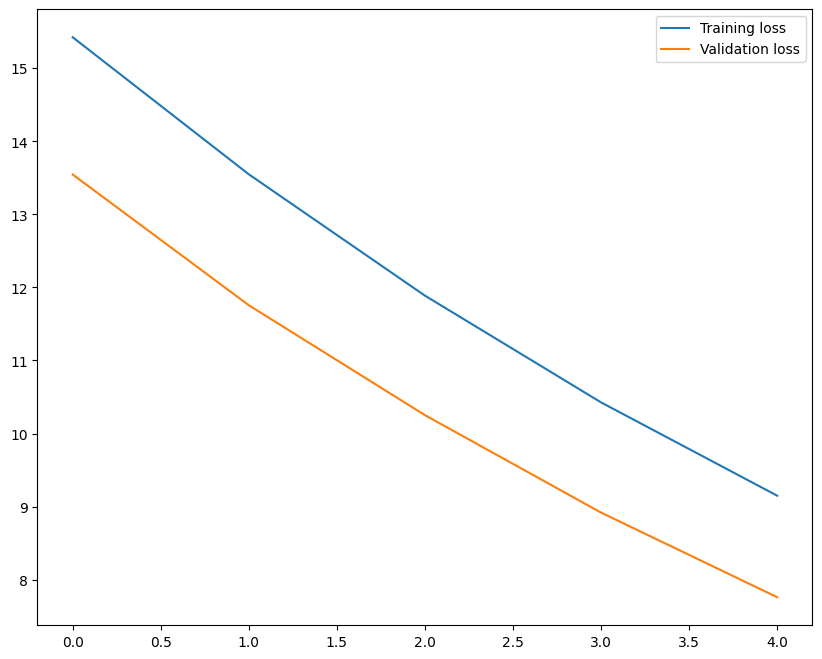

In [ ]:
#from keras_self_attention import Attention
from keras.regularizers import l2
from keras.optimizers import Adam
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
#Attention()
model.add(LSTM(units=64, input_shape=(trainX.shape[1], trainX.shape[2]),
               kernel_regularizer=l2(0.09), recurrent_regularizer=l2(0.09)))

model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.add(Dense(trainY.shape[1]))

optimizer = Adam(lr=0.003)
model.compile(optimizer=optimizer, loss='mean_squared_error')

#model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#Predicting...
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())


In [ ]:
df_forecast = pd.DataFrame({'판매일':np.array(forecast_dates), 'Grand Total':y_pred_future})

In [ ]:
df_forecast

,판매일,Grand Total
0,2019-04-08,541554.6250
1,2019-04-09,540952.9375
2,2019-04-10,540902.5625
3,2019-04-11,540913.5625
4,2019-04-12,541051.2500
5,2019-04-15,541242.0625
6,2019-04-16,541777.9375
7,2019-04-17,541463.5625
8,2019-04-18,540885.3750
9,2019-04-19,540890.5000


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.



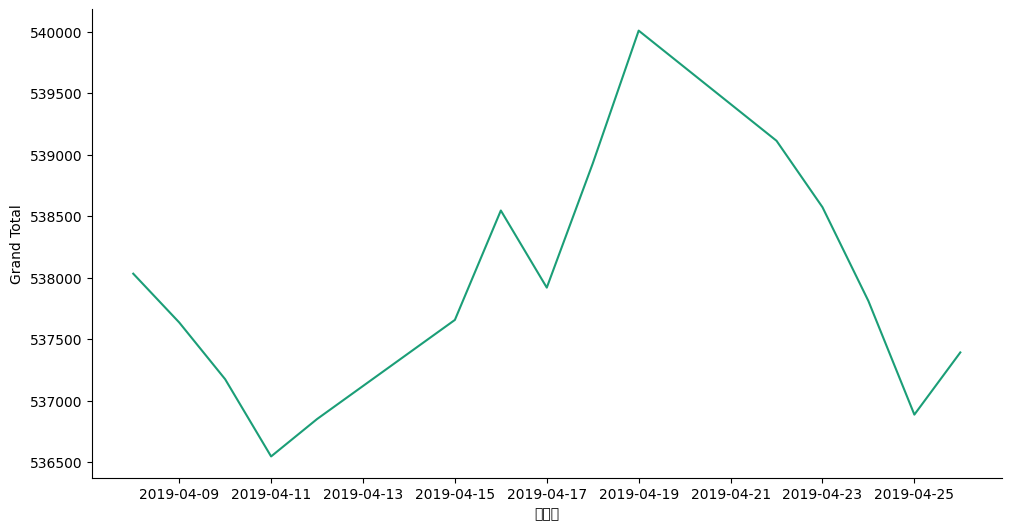

In [ ]:
# @title 판매일 vs Grand Total

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['판매일']
  ys = series['Grand Total']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_forecast.sort_values('판매일', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('판매일')
_ = plt.ylabel('Grand Total')